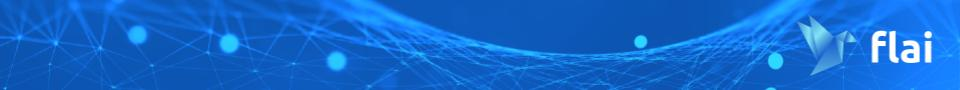

## **Aula 11 - Regressão com PyCaret**

---
## **Importação e Preparação dos Dados**

In [53]:
#instalar pycaret
!pip install pycaret

In [54]:
from pycaret.datasets import get_data
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [55]:
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


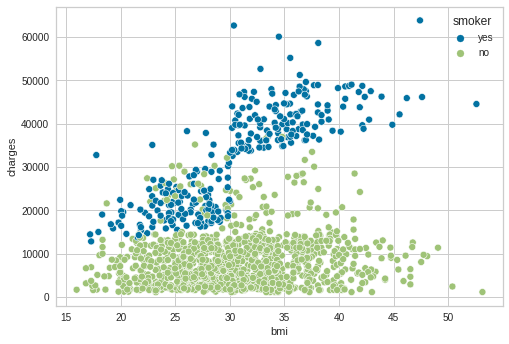

In [56]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

## **Objetivo: construir um modelo para previsão dos custos médicos de uma pessoa**

In [57]:
# funções que iremos utilizar do PyCaret
from pycaret.regression import setup, models, create_model, tune_model, \
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, \
                               finalize_model, save_model, load_model

In [58]:
# configuração da regressão
regressao = setup(data = dados, target = 'charges', normalize = True)

,Description,Value
0,session_id,5484
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [59]:
?setup()

In [60]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [61]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2541.0371,1.765282e+07,4201.5255,0.8913,0.3969,0.3231
1,2546.6727,1.826796e+07,4274.1035,0.8455,0.4067,0.2599
2,3435.2850,3.306295e+07,5750.0393,0.7734,0.4477,0.3009
3,2882.2813,3.318877e+07,5760.9693,0.7563,0.4862,0.2734
4,2824.7744,2.825812e+07,5315.8367,0.8616,0.4733,0.2948
5,2739.6217,2.330840e+07,4827.8770,0.7840,0.4402,0.3340
6,2457.9589,1.914873e+07,4375.9257,0.8884,0.4245,0.2613
7,2688.7286,2.442599e+07,4942.2655,0.8218,0.5414,0.4570
8,3133.1123,3.001908e+07,5478.9666,0.7978,0.4789,0.2992
9,2570.9139,2.330498e+07,4827.5236,0.8568,0.3616,0.2796


In [62]:
rf_tunado = tune_model(rf, optimize = 'RMSLE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2144.8255,1.135766e+07,3370.1123,0.9300,0.3406,0.2882
1,2394.6462,1.725719e+07,4154.1778,0.8540,0.3962,0.2474
2,3208.1013,3.084898e+07,5554.1862,0.7885,0.4136,0.2745
3,2752.6269,2.906765e+07,5391.4425,0.7866,0.4395,0.2512
4,2841.0063,2.627731e+07,5126.1394,0.8713,0.4239,0.2656
5,2475.9603,1.828170e+07,4275.7109,0.8306,0.4098,0.3210
6,2113.2724,1.466338e+07,3829.2789,0.9146,0.3867,0.2542
7,2372.4732,1.694332e+07,4116.2269,0.8764,0.4100,0.3166
8,2708.4210,2.525463e+07,5025.3981,0.8299,0.4423,0.2928
9,2631.3360,2.124542e+07,4609.2754,0.8694,0.3925,0.3320


In [63]:
# Comparando os modelos implementados, ordenando pelo RMSLE
melhores = compare_models(sort = 'RMSLE', n_select = 5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2603.0702,2.253237e+07,4689.4774,0.8452,0.4184,0.2870,0.093
par,Passive Aggressive Regressor,3403.1132,4.433121e+07,6603.6813,0.6944,0.4359,0.2008,0.077
huber,Huber Regressor,3244.5432,4.686899e+07,6771.5435,0.6761,0.4440,0.2054,0.043
rf,Random Forest Regressor,2782.0386,2.506378e+07,4975.5033,0.8277,0.4457,0.3083,0.552
et,Extra Trees Regressor,2720.0003,2.766749e+07,5216.8318,0.8107,0.4527,0.2920,0.502
lightgbm,Light Gradient Boosting Machine,2875.9730,2.407507e+07,4858.2570,0.8352,0.5114,0.3464,0.089
dt,Decision Tree Regressor,3444.1296,5.061119e+07,7088.5209,0.6510,0.5347,0.3906,0.016
knn,K Neighbors Regressor,5010.3161,6.593924e+07,8062.3538,0.5598,0.5558,0.4345,0.061
ridge,Ridge Regression,4165.6964,3.627233e+07,5987.8873,0.7524,0.5565,0.4169,0.015
br,Bayesian Ridge,4161.8987,3.627593e+07,5988.0497,0.7524,0.5593,0.4163,0.014


In [64]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2214.5105,1.213656e+07,3483.7560,0.9252,0.3411,0.2861
1,2199.4280,1.687613e+07,4108.0566,0.8572,0.3824,0.2215
2,3358.6087,3.449874e+07,5873.5629,0.7635,0.4340,0.2763
3,2830.5854,3.063267e+07,5534.6793,0.7751,0.4416,0.2672
4,2876.3191,2.741855e+07,5236.2727,0.8657,0.4705,0.2857
5,2563.8417,2.139856e+07,4625.8574,0.8017,0.4353,0.3449
6,2285.5445,1.671380e+07,4088.2512,0.9026,0.4102,0.2812
7,2229.4117,1.629224e+07,4036.3650,0.8812,0.3982,0.2982
8,2965.1230,2.833564e+07,5323.1230,0.8091,0.4486,0.3076
9,2507.3295,2.102085e+07,4584.8496,0.8708,0.4222,0.3017


In [65]:
gbr_tunado = tune_model(gbr, optimize = 'RMSLE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2501.2135,1.453066e+07,3811.9109,0.9105,0.4255,0.3798
1,2607.5586,1.703040e+07,4126.7901,0.8559,0.3956,0.2967
2,3585.5026,3.694218e+07,6078.0076,0.7468,0.4371,0.3314
3,3157.2604,2.965260e+07,5445.4201,0.7823,0.4467,0.2993
4,3357.9948,3.153867e+07,5615.9302,0.8455,0.4373,0.3053
5,3059.5537,1.985664e+07,4456.0790,0.8160,0.4762,0.4411
6,3173.4663,2.258813e+07,4752.6970,0.8684,0.4508,0.3597
7,2619.5629,1.879914e+07,4335.7973,0.8629,0.4300,0.3215
8,3283.8013,2.791468e+07,5283.4343,0.8119,0.4225,0.2943
9,3179.1330,2.462250e+07,4962.1064,0.8487,0.4206,0.3803


In [66]:
modelo_combinado = blend_models(melhores)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2241.5121,1.320797e+07,3634.2774,0.9186,0.3012,0.2252
1,2517.5448,2.157046e+07,4644.4006,0.8175,0.3833,0.2050
2,3507.8515,3.799329e+07,6163.8701,0.7396,0.4199,0.2446
3,2952.8211,3.361239e+07,5797.6191,0.7532,0.4410,0.2131
4,3043.7208,3.073107e+07,5543.5612,0.8495,0.4500,0.2334
5,2540.9432,2.102663e+07,4585.4805,0.8052,0.3662,0.2370
6,2148.0872,1.555472e+07,3943.9468,0.9094,0.3716,0.1834
7,2641.4463,2.348665e+07,4846.3024,0.8287,0.4122,0.2795
8,3003.0121,3.104226e+07,5571.5584,0.7909,0.4383,0.2309
9,2563.6064,2.421484e+07,4920.8580,0.8512,0.2966,0.2052


In [67]:
modelo_stack = stack_models(melhores)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2268.8901,1.221293e+07,3494.7002,0.9248,0.3653,0.3137
1,2639.4202,1.883541e+07,4339.9781,0.8407,0.3857,0.2473
2,3665.0362,3.432227e+07,5858.5208,0.7647,0.4237,0.2909
3,2933.2145,3.083798e+07,5553.1955,0.7736,0.4428,0.2658
4,3075.2473,2.784065e+07,5276.4244,0.8636,0.4890,0.2907
5,3125.8971,2.332012e+07,4829.0909,0.7839,0.4347,0.3697
6,2449.9533,1.676730e+07,4094.7894,0.9023,0.4017,0.2692
7,2704.2975,1.946645e+07,4412.0805,0.8580,0.4626,0.3511
8,2920.5148,2.680989e+07,5177.8272,0.8194,0.4443,0.2928
9,2665.1804,2.216297e+07,4707.7563,0.8638,0.3586,0.2952


In [69]:
# Performance nos dados de validacao
pred = predict_model(rf_tunado)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2437.6689,1.943233e+07,4408.2117,0.8579,0.4229,0.2726


In [70]:
pred

,age,bmi,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-0.889669,-0.376789,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18310.742188,20947.036373
1,-0.247460,0.609386,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37742.574219,38181.201571
2,1.036956,-1.291454,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12094.477539,12727.784760
3,0.394748,-0.094075,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7441.053223,8250.319448
4,-1.103738,0.049777,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34254.054688,34645.749488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.251025,-0.469919,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11554.223633,14126.542183
398,-1.032381,0.536213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3227.121094,5124.563951
399,0.109322,0.828905,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40273.644531,41008.307202
400,-1.317807,-0.297795,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1906.358276,2375.559866


In [71]:
evaluate_model(rf_tunado)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [72]:
# Utilizando o modelo escolhido nos dados todos para gerar o modelo final
modelo_final = finalize_model(rf_tunado)

In [73]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-charges')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=5,
                                        max_features=1.0, max_leaf_nodes=None,
                                        max_samples=None,
                                   

---

## Deploy Básico

In [74]:
import pandas as pd
modelo = load_model('meu-melhor-modelo-para-charges')

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))  

    print('Custo do Seguro: ${}'.format(pred)) 


Transformation Pipeline and Model Successfully Loaded


In [75]:
CustoSeguro(age = 31, 
            sex = 'male', 
            bmi = 25, 
            children = 0, 
            smoker =  'yes', 
            region = 'southwest')

Custo do Seguro: $19342.67


In [79]:
CustoSeguro(40, 'female', 30, 2, 'yes', 'southwest')

Custo do Seguro: $24513.4


---
# **Exercício Proposto**

# Procure por um novo conjunto de dados para regressão na lista de datasets do PyCaret. Determine um objetivo de modelagem nesse conjunto de dados e use o PyCaret para criar uma solução. 

*Exemplo: Conjunto de dados **traffic**, no qual há informações sobre tráfego de carros para previsão do trânsito ("traffic_volume")*


---
**_#itstimetoflai_** 